In [1]:
%env TIKE_PTYCHO_BACKEND=cudafft
%env TIKE_TOMO_BACKEND=cudafft

env: TIKE_PTYCHO_BACKEND=cudafft
env: TIKE_TOMO_BACKEND=cudafft


In [2]:
import lzma
import pickle

import numpy as np
import matplotlib.pyplot as plt

import tike.ptycho
import tike.view
import tike.tike

In [3]:
import logging

logging.basicConfig(level=logging.INFO)

# Setup Experiment

## Object

In [4]:
# Load a 3D object.
with lzma.open('../tests/data/nalm256.pickle.lzma', 'rb') as file:
    obj = pickle.load(file)[::4, ::4, ::4].astype('complex64')
obj.shape

(64, 64, 64)

In [5]:
np.min(obj), np.max(obj)

(0j, (0.00013467284+2.7094511e-05j))

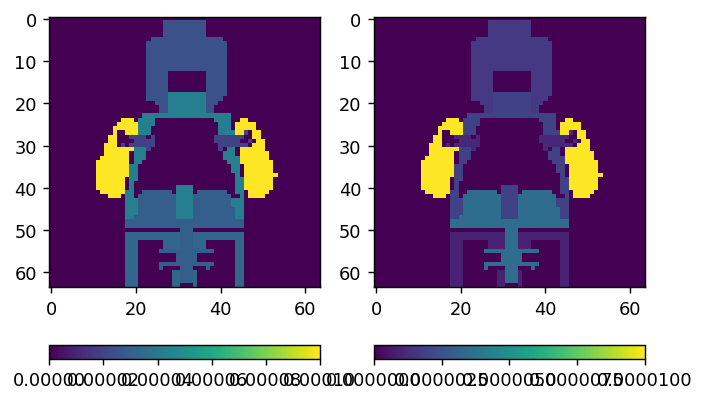

In [6]:
# Assemble the object.
voxelsize = 1e-7 * 4
tike.view.plot_complex(obj[:, len(obj)//2, :], rmax=1e-4, imax=1e-5)

## Trajectory & Probe

In [7]:
N_ANGLE = int(np.pi / 2 * obj.shape[2])
theta = np.linspace(0, np.pi, N_ANGLE, endpoint=False).astype('float32')
theta.shape

(100,)

/home/beams0/DCHING/Documents/tike/src/tike/view.py:100: UserWarning: This phase plot will be incorrect because the phase of a zero-amplitude complex number is undefined. Adding a small constant to the amplitude may help.
  "This phase plot will be incorrect because "


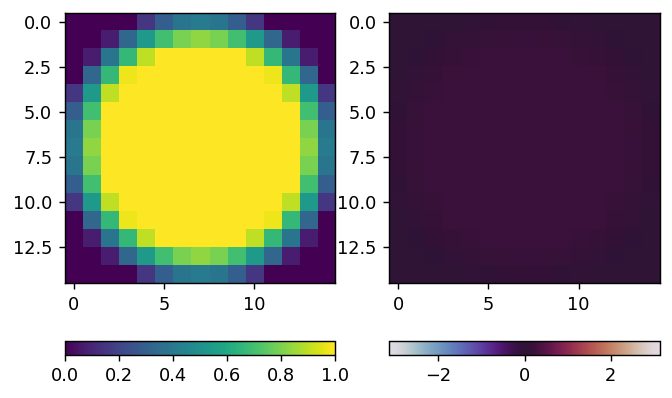

0j (0.9800666+0.19866933j)


(100, 15, 15)

In [8]:
# Create a probe.
pw = 15 # probe width
energy = 5 # keV probe energy
weights = tike.ptycho.probe.gaussian(pw, rin=0.8, rout=1.0)
probe = np.tile(weights * np.exp(1j * weights * 0.2), (N_ANGLE, 1, 1))
tike.view.plot_phase(probe[0])
probe.shape

In [9]:
none, v, h = np.meshgrid(
    np.arange(N_ANGLE),
    np.linspace(0, obj.shape[0]-pw, pw//2,),
    np.linspace(0, obj.shape[2]-pw, pw//2,),
    indexing='ij'
)
scan = np.stack((np.ravel(v), np.ravel(h)), axis=-1).reshape(N_ANGLE, -1, 2).astype('float32')
scan.shape

(100, 49, 2)

# Simulate data

In [10]:
data = tike.tike.simulate(
    obj=obj, voxelsize=voxelsize,
    probe=probe, theta=theta, scan=scan, energy=energy,
    detector_shape=pw*4,
)

INFO:tike.communicator:Node 0 is running.


In [11]:
np.min(data), np.max(data)

(2.791621e-12, 5.937125)

In [12]:
np.array(data).shape, data.dtype

((100, 49, 60, 60), dtype('float32'))

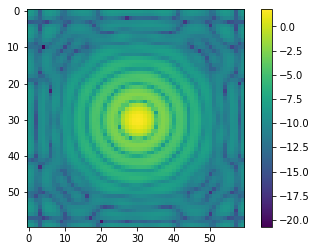

(2.791621e-12, 5.937125)

In [13]:
plt.imshow(np.fft.fftshift(np.log(data[16][16])))
plt.colorbar()
plt.show()
np.min(data), np.max(data)

In [14]:
import importlib
importlib.reload(tike.tike)
importlib.reload(tike.ptycho)

<module 'tike.ptycho' from '/home/beams0/DCHING/Documents/tike/src/tike/ptycho/__init__.py'>

# Reconstruct

In [15]:
# recon = np.random.rand(*obj.shape, 2).view(complex)[..., 0].astype('complex64')
recon = np.zeros(obj.shape, dtype='complex64')
recon.shape
psi = np.ones((len(theta), obj.shape[-1], obj.shape[-1]), dtype='complex64')

INFO:tike.communicator:Node 0 is running.
INFO:tike.tike:ADMM iteration 0
INFO:tike.tike:ADMM iteration 1
INFO:tike.tike:ADMM iteration 2
INFO:tike.tike:ADMM iteration 3
INFO:tike.tike:ADMM iteration 4


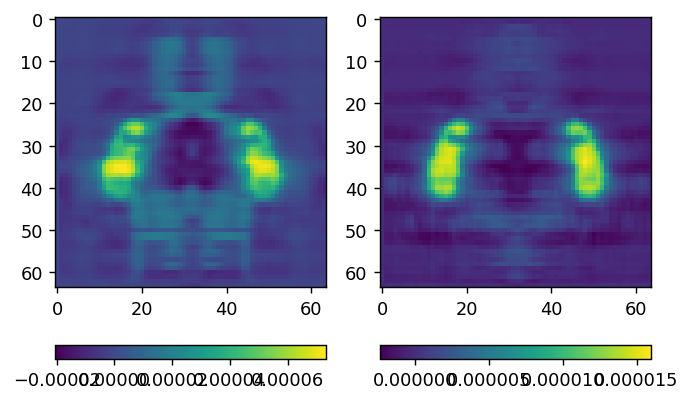

INFO:tike.communicator:Node 0 is running.
INFO:tike.tike:ADMM iteration 0
INFO:tike.tike:ADMM iteration 1
INFO:tike.tike:ADMM iteration 2
INFO:tike.tike:ADMM iteration 3
INFO:tike.tike:ADMM iteration 4


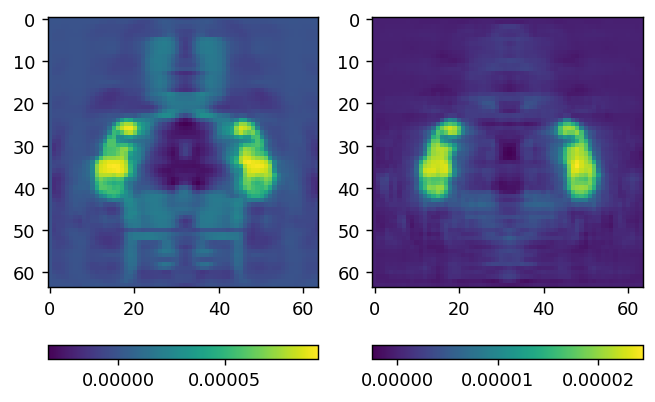

INFO:tike.communicator:Node 0 is running.
INFO:tike.tike:ADMM iteration 0
INFO:tike.tike:ADMM iteration 1
INFO:tike.tike:ADMM iteration 2
INFO:tike.tike:ADMM iteration 3
INFO:tike.tike:ADMM iteration 4


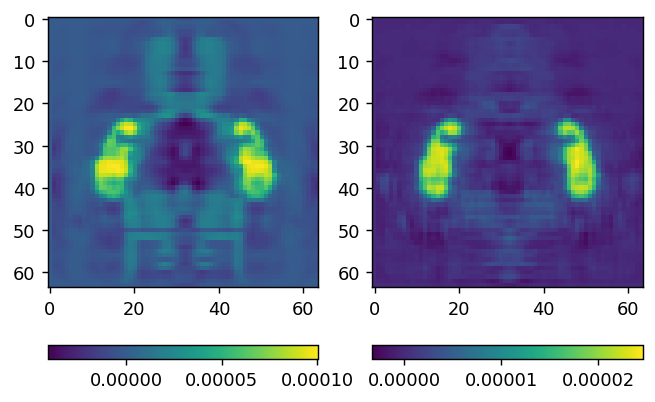

INFO:tike.communicator:Node 0 is running.
INFO:tike.tike:ADMM iteration 0
INFO:tike.tike:ADMM iteration 1
INFO:tike.tike:ADMM iteration 2
INFO:tike.tike:ADMM iteration 3
INFO:tike.tike:ADMM iteration 4


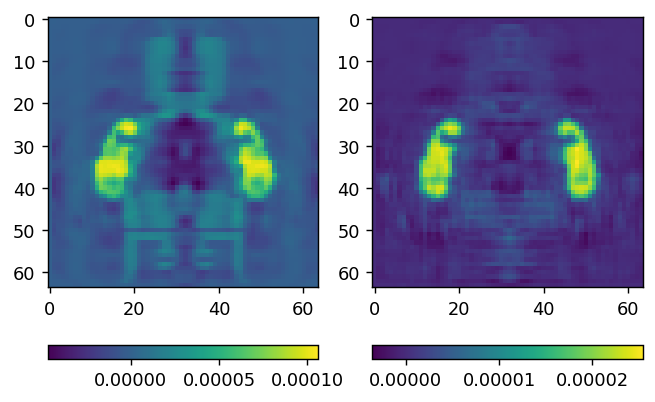

INFO:tike.communicator:Node 0 is running.
INFO:tike.tike:ADMM iteration 0
INFO:tike.tike:ADMM iteration 1
INFO:tike.tike:ADMM iteration 2
INFO:tike.tike:ADMM iteration 3
INFO:tike.tike:ADMM iteration 4


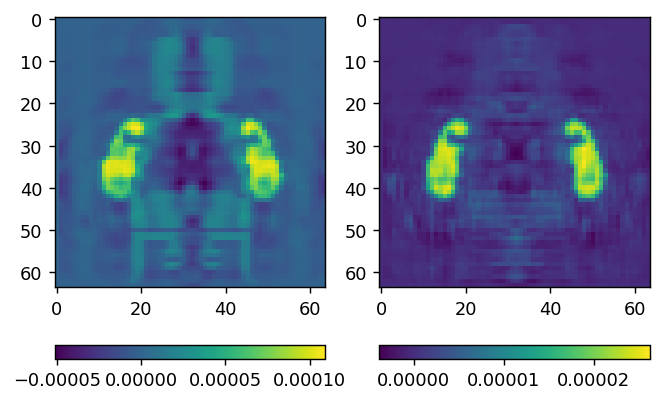

INFO:tike.communicator:Node 0 is running.
INFO:tike.tike:ADMM iteration 0
INFO:tike.tike:ADMM iteration 1
INFO:tike.tike:ADMM iteration 2
INFO:tike.tike:ADMM iteration 3
INFO:tike.tike:ADMM iteration 4


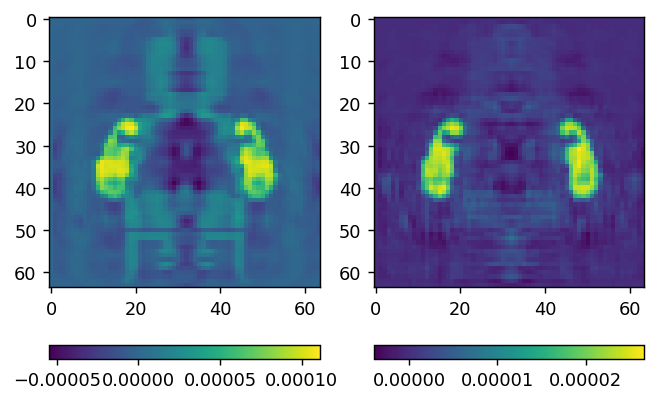

INFO:tike.communicator:Node 0 is running.
INFO:tike.tike:ADMM iteration 0
INFO:tike.tike:ADMM iteration 1
INFO:tike.tike:ADMM iteration 2
INFO:tike.tike:ADMM iteration 3
INFO:tike.tike:ADMM iteration 4


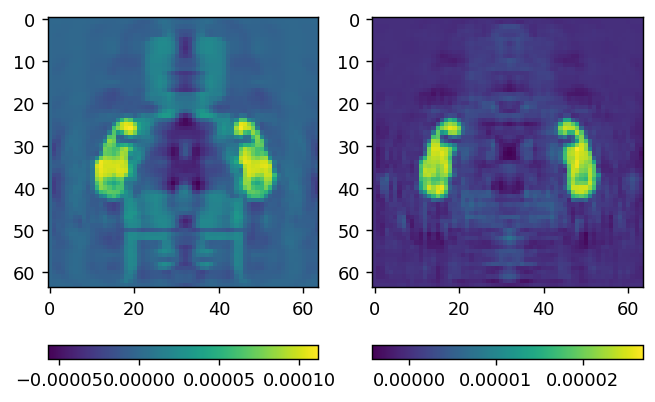

INFO:tike.communicator:Node 0 is running.
INFO:tike.tike:ADMM iteration 0
INFO:tike.tike:ADMM iteration 1
INFO:tike.tike:ADMM iteration 2
INFO:tike.tike:ADMM iteration 3
INFO:tike.tike:ADMM iteration 4


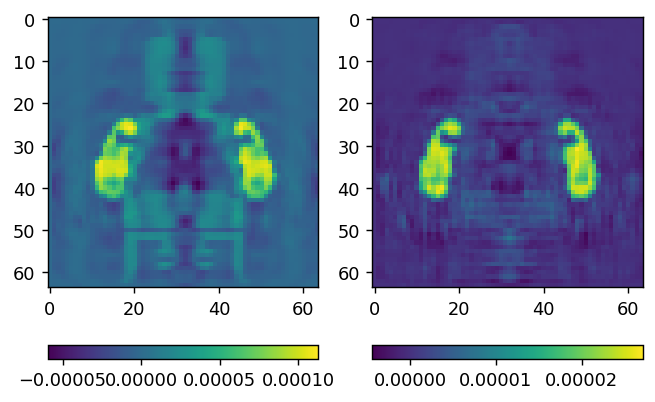

INFO:tike.communicator:Node 0 is running.
INFO:tike.tike:ADMM iteration 0
INFO:tike.tike:ADMM iteration 1
INFO:tike.tike:ADMM iteration 2
INFO:tike.tike:ADMM iteration 3
INFO:tike.tike:ADMM iteration 4


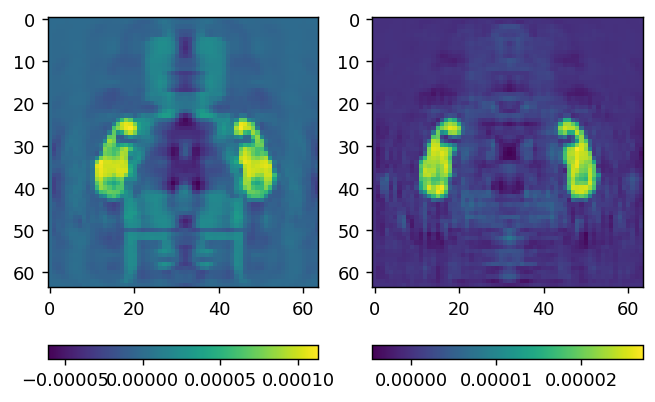

INFO:tike.communicator:Node 0 is running.
INFO:tike.tike:ADMM iteration 0
INFO:tike.tike:ADMM iteration 1
INFO:tike.tike:ADMM iteration 2
INFO:tike.tike:ADMM iteration 3
INFO:tike.tike:ADMM iteration 4


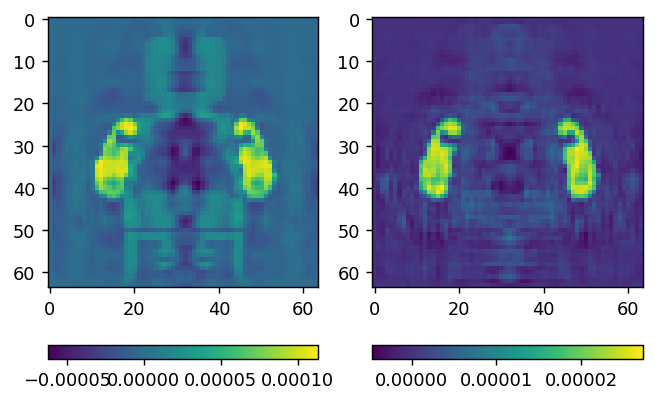

In [16]:
for i in range(10):
    recon = tike.tike.admm(obj=recon, voxelsize=voxelsize,
                 data=data,
                 probe=probe, theta=theta, scan=scan, energy=energy,
                 num_iter=5,
                 rho=0.5,
                )
    tike.view.plot_complex(recon[:, len(recon)//2, :])

In [17]:
np.min(recon), np.max(recon)

((-6.249845e-05-1.9926415e-06j), (0.00013293717+2.6489479e-05j))